In [1]:
#import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the customer data 

In [4]:
data = pd.read_csv("Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.shape

(500, 8)

In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
len(data.Avatar.unique()), data.Avatar.unique()

(138,
 array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
        'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
        'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
        'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
        'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
        'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
        'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
        'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
        'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
        'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
        'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
        'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
        'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
        'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
        'DarkKhaki', 'Fir

In [10]:
#EDA

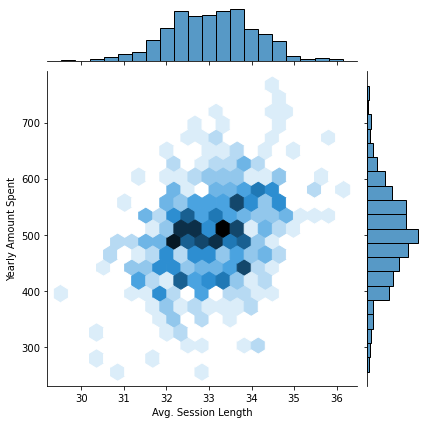

In [11]:
#analyse univariate and bivariate
sns.jointplot(x='Avg. Session Length',y ='Yearly Amount Spent', data = data,  kind = "hex")

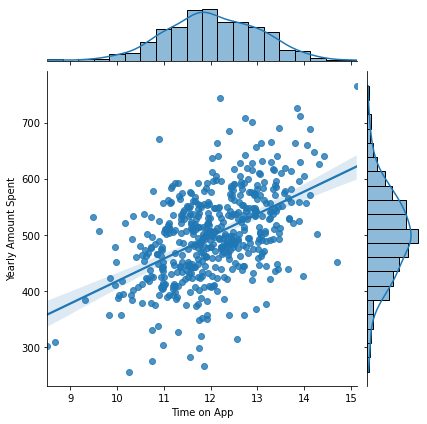

In [12]:
#Create jointplot to compare the Time on App column
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = data, kind = "reg")

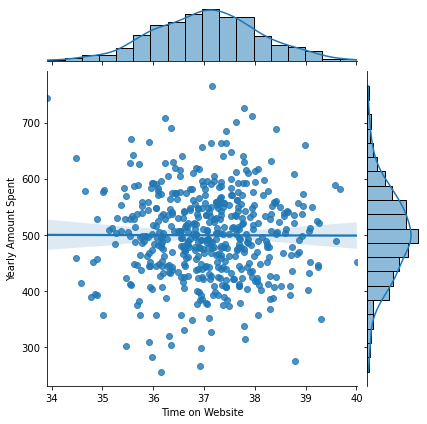

In [13]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = data, kind = "reg")

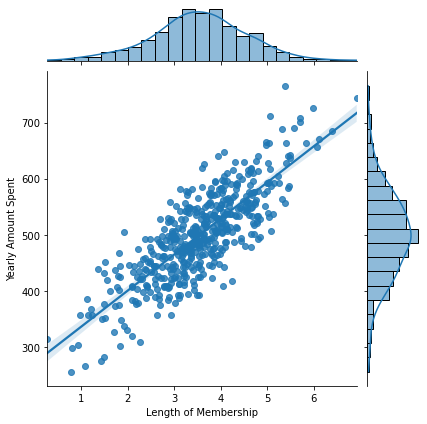

In [14]:
sns.jointplot(x='Length of Membership',y ='Yearly Amount Spent', data = data, kind = "reg")

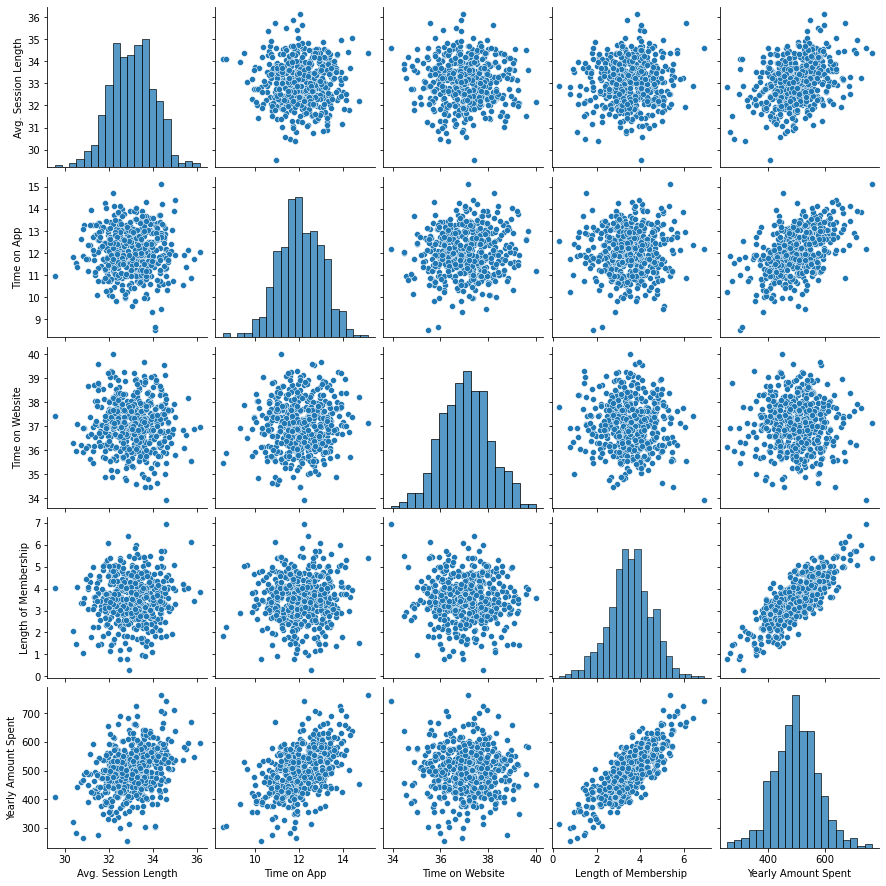

In [15]:
#correaltion between bivariate 
sns.pairplot(data)

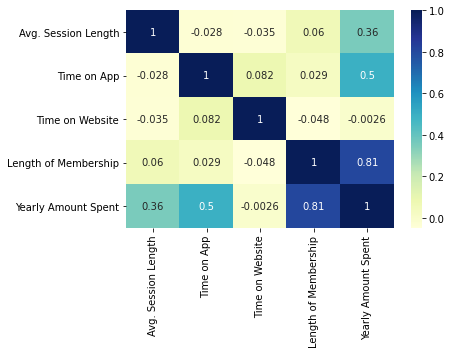

In [16]:
#heatmap correlation
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [17]:
#split the data 

In [18]:
X =  data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400,), (100,))

In [21]:
X_train, cv_train, y_train, cv_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [22]:
X_train.shape,  cv_train.shape,y_train.shape, cv_test.shape

((320, 4), (80, 4), (320,), (80,))

In [23]:
#modeling the data

In [24]:
lm=LinearRegression()

<IPython.core.display.Javascript object>

In [25]:
lm=LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)
len(y_pred)

<IPython.core.display.Javascript object>

100

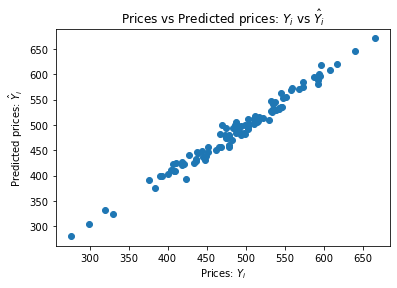

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

C:\Users\Dhivakar\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


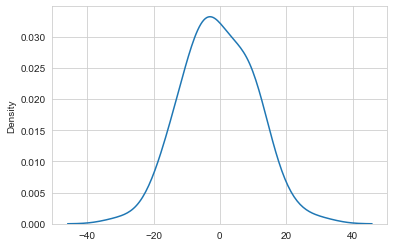

In [27]:
#checking the distribution of errors using prediction y_test -  y_pred

delta = y_test -  y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

C:\Users\Dhivakar\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


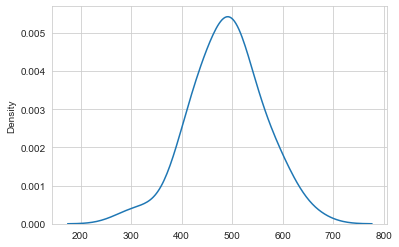

In [28]:
#checking the distribution of errors using actual y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=.5)
plt.show()

In [29]:
#applying min max scaling
#preprocessing and feature engineering to check the distribution before and after normalizing the data

from sklearn.preprocessing import MinMaxScaler

In [30]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
322,33.264632,10.732131,36.145792,4.086566
117,33.059264,11.725910,35.999099,5.004821
311,34.729080,11.966898,36.547596,2.957449
254,32.711119,12.326291,36.673878,3.350279
288,32.312910,9.824402,35.742779,2.921350
...,...,...,...,...
157,34.603311,12.207298,33.913847,6.922689
228,32.727319,13.013376,36.651278,2.367848
27,32.335990,13.007819,37.851779,2.996365
480,34.238242,11.550300,35.769330,4.183144


In [31]:
scaler = MinMaxScaler().fit(X_train)
print(scaler)
#model = model.transform(X_train)

MinMaxScaler()


In [32]:
scaler.data_min_, scaler.data_max_

(array([30.57436368,  8.50815218, 33.91384725,  0.26990109]),
 array([35.86023651, 15.12699429, 39.60037647,  6.92268934]))

In [33]:
X_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,320.000000,320.000000,320.000000,320.000000
mean,33.055394,12.001888,37.002152,3.601088
std,0.964560,1.018738,1.011239,1.019728
min,30.574364,8.508152,33.913847,0.269901
25%,32.341822,11.348296,36.296917,2.990958
50%,33.102898,11.965959,37.057153,3.639599
75%,33.700702,12.705441,37.681185,4.185689
max,35.860237,15.126994,39.600376,6.922689


In [34]:
scaler.feature_range

(0, 1)

In [35]:
scaler.transform(X_train)

array([[0.50895443, 0.33600728, 0.39249679, 0.57369408],
       [0.47010219, 0.48615118, 0.36670031, 0.71171955],
       [0.78600387, 0.52256057, 0.46315581, 0.40397313],
       ...,
       [0.33327059, 0.67982695, 0.69250184, 0.40982267],
       [0.69314536, 0.45961935, 0.32629435, 0.5882109 ],
       [0.45511226, 0.40686989, 0.6639357 , 0.32211004]])

In [36]:
scaler = MinMaxScaler().fit(X_test)
scaler.transform(X_test)

array([[0.29311963, 0.19106667, 0.80066152, 0.60720969],
       [0.4203467 , 0.64840899, 0.38255692, 0.703379  ],
       [0.18346228, 0.14545818, 0.59266925, 0.7925604 ],
       [0.35784302, 0.76706062, 0.42559345, 0.49348397],
       [0.17339333, 0.31078054, 0.599106  , 0.60589525],
       [0.35459181, 0.84662029, 0.66295562, 0.6852507 ],
       [0.80819338, 0.4852006 , 0.12350374, 0.57851948],
       [0.45621121, 0.45283174, 0.49439621, 0.69936426],
       [0.35457778, 0.36856953, 0.51728616, 0.4561503 ],
       [0.4533565 , 0.30200464, 0.51051815, 0.6974873 ],
       [0.26857565, 0.46264004, 0.40615069, 0.55376468],
       [0.53359507, 0.38382768, 0.56478049, 0.40705756],
       [0.43019684, 0.51092623, 0.07891262, 0.36841632],
       [0.74172409, 0.18925076, 0.20102193, 0.82907901],
       [0.34997272, 0.4246466 , 0.60658193, 0.49928341],
       [0.5563932 , 0.30112073, 0.2037707 , 0.45717477],
       [0.49499458, 0.78714447, 0.25515931, 0.67916347],
       [0.4957325 , 0.55363478,

In [37]:
lm=LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

<IPython.core.display.Javascript object>

array([403.72911119, 542.02044106, 427.22783173, 501.6541933 ,
       410.3174096 , 569.72661883, 530.28840954, 505.73990341,
       408.43502809, 473.44355401, 441.30170287, 424.66600578,
       424.35730152, 526.17756456, 431.24320146, 423.09576461,
       574.9387342 , 484.04865605, 457.54714626, 481.33318724,
       501.1026509 , 512.42829582, 507.3353428 , 645.75395729,
       449.34044526, 495.47417975, 556.09829678, 553.73465737,
       399.53855005, 325.60348814, 531.82324118, 477.96447337,
       500.31786487, 305.56349307, 505.15276118, 482.80185277,
       518.29984688, 437.39187593, 456.38037114, 470.5643486 ,
       493.44684245, 444.51319095, 507.9092574 , 500.61274987,
       488.59459059, 534.51839995, 594.32180148, 513.06635664,
       281.04417776, 433.33804802, 421.48619695, 480.91423227,
       584.57868853, 608.2755777 , 563.82570124, 493.4624346 ,
       394.02977853, 456.31671296, 571.56301872, 499.40504505,
       512.16827469, 391.6621814 , 479.61105849, 480.69

C:\Users\Dhivakar\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


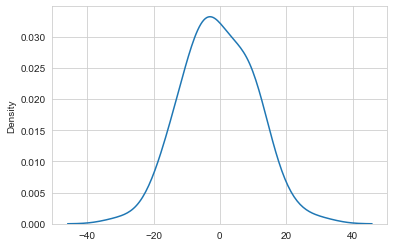

In [38]:
delta = y_test -  y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [39]:
#thus minmaxscaling has minute effect over error distribution

In [40]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 8.48872927850419
MSE: 108.74902550016432
RMSE: 10.428280083511583
